<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/kNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
sns.set()

In [ ]:
files.upload()
food_2 = pd.read_excel('ABBREV_with_CLASS.xlsx')
food_2.head()

Saving ABBREV_with_CLASS.xlsx to ABBREV_with_CLASS.xlsx


,Unnamed: 0,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,CLASS
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,10
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,10
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0,0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0,10
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,10


In [ ]:
food_2.describe()

,Unnamed: 0,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct,CLASS
count,8790.000000,8790.000000,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,...,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8740.000000,8790.000000
mean,4394.500000,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,...,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,4.964416,5.715586
std,2537.598767,9251.413586,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,...,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,12.088471,5.076376
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000,0.000000
25%,2197.250000,9086.250000,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,...,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,0.000000,0.000000
50%,4394.500000,14427.500000,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,...,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,0.000000,10.000000
75%,6591.750000,20142.750000,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,...,6.000000,5.200000,4.345000,5.115000,2.081000,67.000000,130.000000,305.000000,0.000000,10.000000
max,8789.000000,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,...,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,81.000000,11.000000


In [ ]:
food_2.describe(include=['O'])

,Shrt_Desc,GmWt_Desc1,GmWt_Desc2
count,8790,8491,4825
unique,8787,911,921
top,"BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVE...",3 oz,1 cup
freq,2,1409,298


In [ ]:
food_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8790 non-null   int64  
 1   NDB_No             8790 non-null   int64  
 2   Shrt_Desc          8790 non-null   object 
 3   Water_(g)          8789 non-null   float64
 4   Energ_Kcal         8790 non-null   int64  
 5   Protein_(g)        8790 non-null   float64
 6   Lipid_Tot_(g)      8790 non-null   float64
 7   Ash_(g)            8465 non-null   float64
 8   Carbohydrt_(g)     8790 non-null   float64
 9   Fiber_TD_(g)       8196 non-null   float64
 10  Sugar_Tot_(g)      6958 non-null   float64
 11  Calcium_(mg)       8442 non-null   float64
 12  Iron_(mg)          8646 non-null   float64
 13  Magnesium_(mg)     8051 non-null   float64
 14  Phosphorus_(mg)    8211 non-null   float64
 15  Potassium_(mg)     8364 non-null   float64
 16  Sodium_(mg)        8707 

In [ ]:
food_2.isnull().sum()

Unnamed: 0              0
NDB_No                  0
Shrt_Desc               0
Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_Carot_(µg)      3162
Beta_Crypt_(

In [ ]:
duplicateRows = food_2[food_2.duplicated()]
duplicateRows

,Unnamed: 0,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,CLASS


In [ ]:
food_2.drop_duplicates()

,Unnamed: 0,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,CLASS
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,10
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,10
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0,0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0,10
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,...,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0,0
8786,8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,...,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0,0
8787,8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,...,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0,10
8788,8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,...,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0,0


In [ ]:
food_2.drop(columns=['GmWt_1','GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2', 'Refuse_Pct', 'Shrt_Desc', 'NDB_No', 'Unnamed: 0'], inplace=True)

In [ ]:
food_2 = food_2.apply(lambda x: x.fillna(x.value_counts().index[0]))
food_2.isnull().sum()

Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(µg)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(µg)      0
Folic_Acid_(µg)      0
Food_Folate_(µg)     0
Folate_DFE_(µg)      0
Choline_Tot_ (mg)    0
Vit_B12_(µg)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(µg)         0
Alpha_Carot_(µg)     0
Beta_Carot_(µg)      0
Beta_Crypt_(µg)      0
Lycopene_(µg)        0
Lut+Zea_ (µg)        0
Vit_E_(mg)           0
Vit_D_µg             0
Vit_D_IU             0
Vit_K_(µg)           0
FA_Sat_(g)           0
FA_Mono_(g)

<Axes: xlabel='CLASS', ylabel='count'>

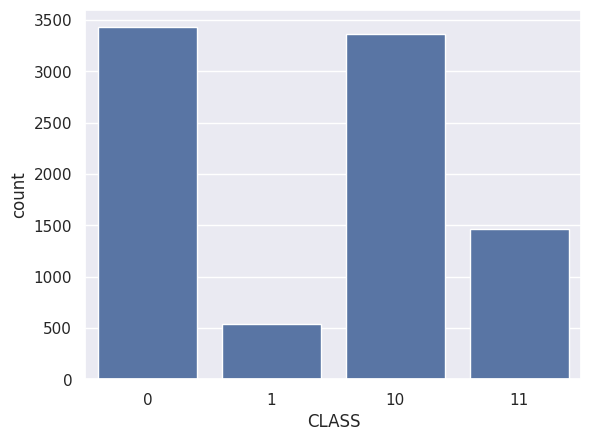

In [ ]:
sns.countplot(x=food_2["CLASS"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = food_2['CLASS'].squeeze()
X = food_2.drop(['CLASS'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7864998103905954

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2431
           1       0.72      0.64      0.68       360
          10       0.86      0.91      0.89      2373
          11       0.84      0.88      0.86       989

    accuracy                           0.87      6153
   macro avg       0.84      0.82      0.83      6153
weighted avg       0.87      0.87      0.87      6153



In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       997
           1       0.60      0.55      0.57       178
          10       0.77      0.81      0.79       989
          11       0.78      0.82      0.80       473

    accuracy                           0.79      2637
   macro avg       0.75      0.74      0.74      2637
weighted avg       0.79      0.79      0.79      2637



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

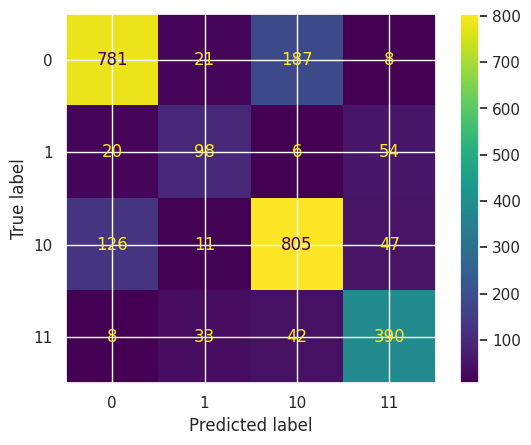

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot();

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
clf_norm = KNeighborsClassifier()
clf_norm.fit(X_train_norm, y_train)
clf_norm.score(X_test_norm, y_test)

0.8801668562760713

In [ ]:
y_pred = clf_norm.predict(X_test_norm)
y_pred

array([ 0,  0, 10, ..., 10,  0, 10])

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
clf_norm = KNeighborsClassifier()
clf_norm.fit(X_train_norm, y_train)
clf_norm.score(X_test_norm, y_test)

0.8900265453166477

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

pca = PCA(n_components=2)
x_np = pca.fit_transform(X)
X = pd.DataFrame(x_np)

enc = LabelEncoder()
y = enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6932119833143724

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

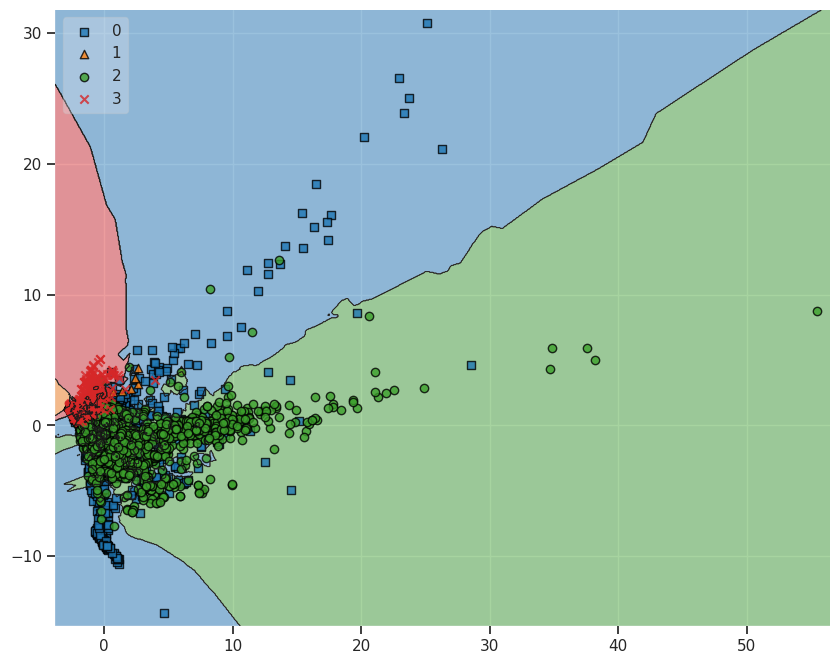

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_regions(x_np, y, clf=clf, legend=2)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 19}


In [ ]:
knn = KNeighborsClassifier()
parametrs = {'n_neighbors':range(10, 100, 5), 'metric':['cityblock', 'euclidean', 'manhattan', 'nan_euclidean', 'minkowki']}
grid = GridSearchCV(knn, parametrs)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['cityblock', 'euclidean', 'manhattan',
                                    'nan_euclidean', 'minkowki'],
                         'n_neighbors': range(10, 100, 5)})

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 15}

In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 73.67%


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_test, y_test)
y_test_hat=knn.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 100.00%
